In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from itertools import combinations

# Otros objetivos
# -----------------------------------------------------------------------
import sys
# Ruta relativa desde notebooks/1-Preprocesing/ a src/
src_path = "../src/"
sys.path.append(src_path)
import soporte_clustering as sc
import pickle
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_encoded=pd.read_csv("../results/data_encoded_robust.csv",index_col=0)
data_encoded.head(3)

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,Category_Furniture,Category_Office Supplies,Category_Technology,Ship Mode,Order Priority,Sales_robust,Quantity_robust,Discount_robust,Profit_robust,Shipping Cost_robust
0,1,0,0,1,0,0,0,0,0,0,0,0,1,2,1,23.119863,2.000000,0.5,24.372049,41.788214
1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,2,23.436346,1.000000,0.0,26.420044,40.079650
2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,22.705522,0.666667,1.0,50.779083,39.587477


In [3]:
df_original=pd.read_csv("../results/data_post_EDA.csv",index_col=0)
df_original.head(3)

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.971,915.49,Medium
1,Standard Class,Consumer,APAC,Furniture,5244.840,6,0.0,996.480,878.38,High
2,Standard Class,Corporate,US,Office Supplies,5083.960,5,0.2,1906.485,867.69,Low


# Clustering

In [4]:
cluster=sc.Clustering(data_encoded)

100%|██████████| 2/2 [00:00<00:00,  4.88it/s]


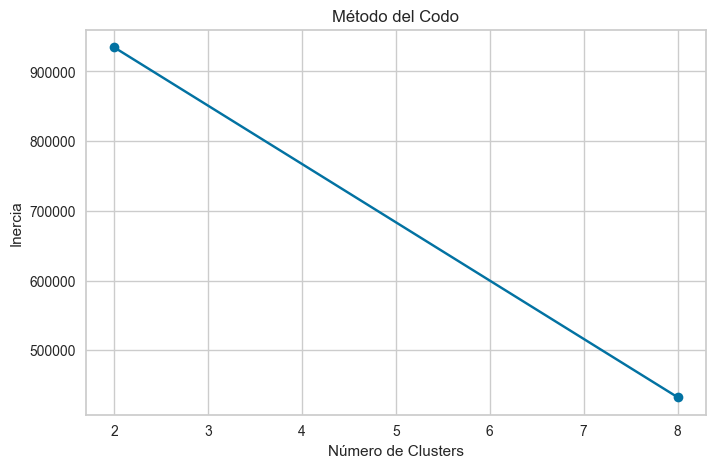

[934754.7190899176, 432548.75552902964]

In [5]:
cluster.elbow_method(cluster_range=(2, 8))

100%|██████████| 6/6 [00:00<00:00, 10.41it/s]


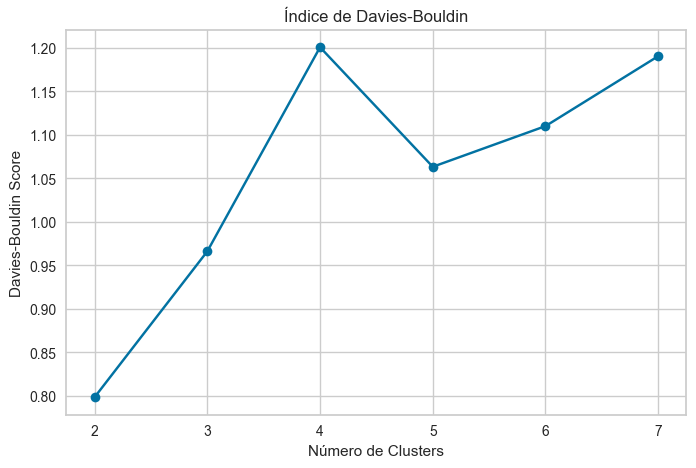

[np.float64(0.798350728686219),
 np.float64(0.9660662732813726),
 np.float64(1.2006742423509473),
 np.float64(1.0632305607343253),
 np.float64(1.1099947875464065),
 np.float64(1.190401682646847)]

In [6]:
cluster.davies_bouldin_method(cluster_range=range(2, 8))

100%|██████████| 6/6 [03:22<00:00, 33.74s/it]


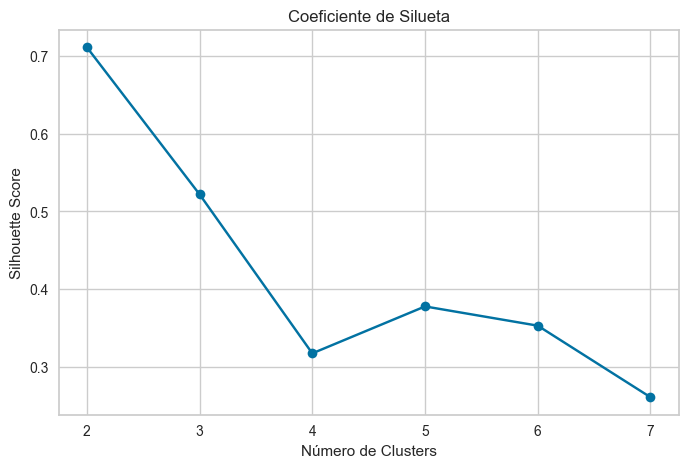

[np.float64(0.7107356973967205),
 np.float64(0.5219264406748085),
 np.float64(0.31784760610259455),
 np.float64(0.37808835738983987),
 np.float64(0.35338645750112574),
 np.float64(0.26156035220551027)]

In [7]:
cluster.silhouette_method(cluster_range=range(2, 8))

In [8]:
df_clusters_kmeans2,labels=cluster.modelo_kmeans(df_original,2)
data_encoded_kmeans2=data_encoded.copy()
data_encoded_kmeans2["clusters_kmeans"]=labels
data_encoded_kmeans2.head(5)

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,Category_Furniture,Category_Office Supplies,Category_Technology,Ship Mode,Order Priority,Sales_robust,Quantity_robust,Discount_robust,Profit_robust,Shipping Cost_robust,clusters_kmeans
0,1,0,0,1,0,0,0,0,0,0,0,0,1,2,1,23.119863,2.000000,0.5,24.372049,41.788214,1
1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,2,23.436346,1.000000,0.0,26.420044,40.079650,1
2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,22.705522,0.666667,1.0,50.779083,39.587477,1
3,0,1,0,1,0,0,0,0,0,0,1,0,0,2,2,20.625843,0.666667,0.0,17.079876,38.108656,1
4,0,0,1,0,0,0,0,0,1,0,1,0,0,2,3,9.703682,1.333333,0.0,16.396488,36.942910,1


In [9]:
df_clusters_kmeans2.head(5)

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.971,915.49,Medium,1
1,Standard Class,Consumer,APAC,Furniture,5244.840,6,0.0,996.480,878.38,High,1
2,Standard Class,Corporate,US,Office Supplies,5083.960,5,0.2,1906.485,867.69,Low,1
3,First Class,Corporate,APAC,Furniture,4626.150,5,0.0,647.550,835.57,High,1
4,Same Day,Home Office,LATAM,Furniture,2221.800,7,0.0,622.020,810.25,Critical,1


In [10]:
sc.calcular_metricas(data_encoded_kmeans2, "clusters_kmeans")

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.710736,0.798351,"{0: 47098, 1: 2393}"


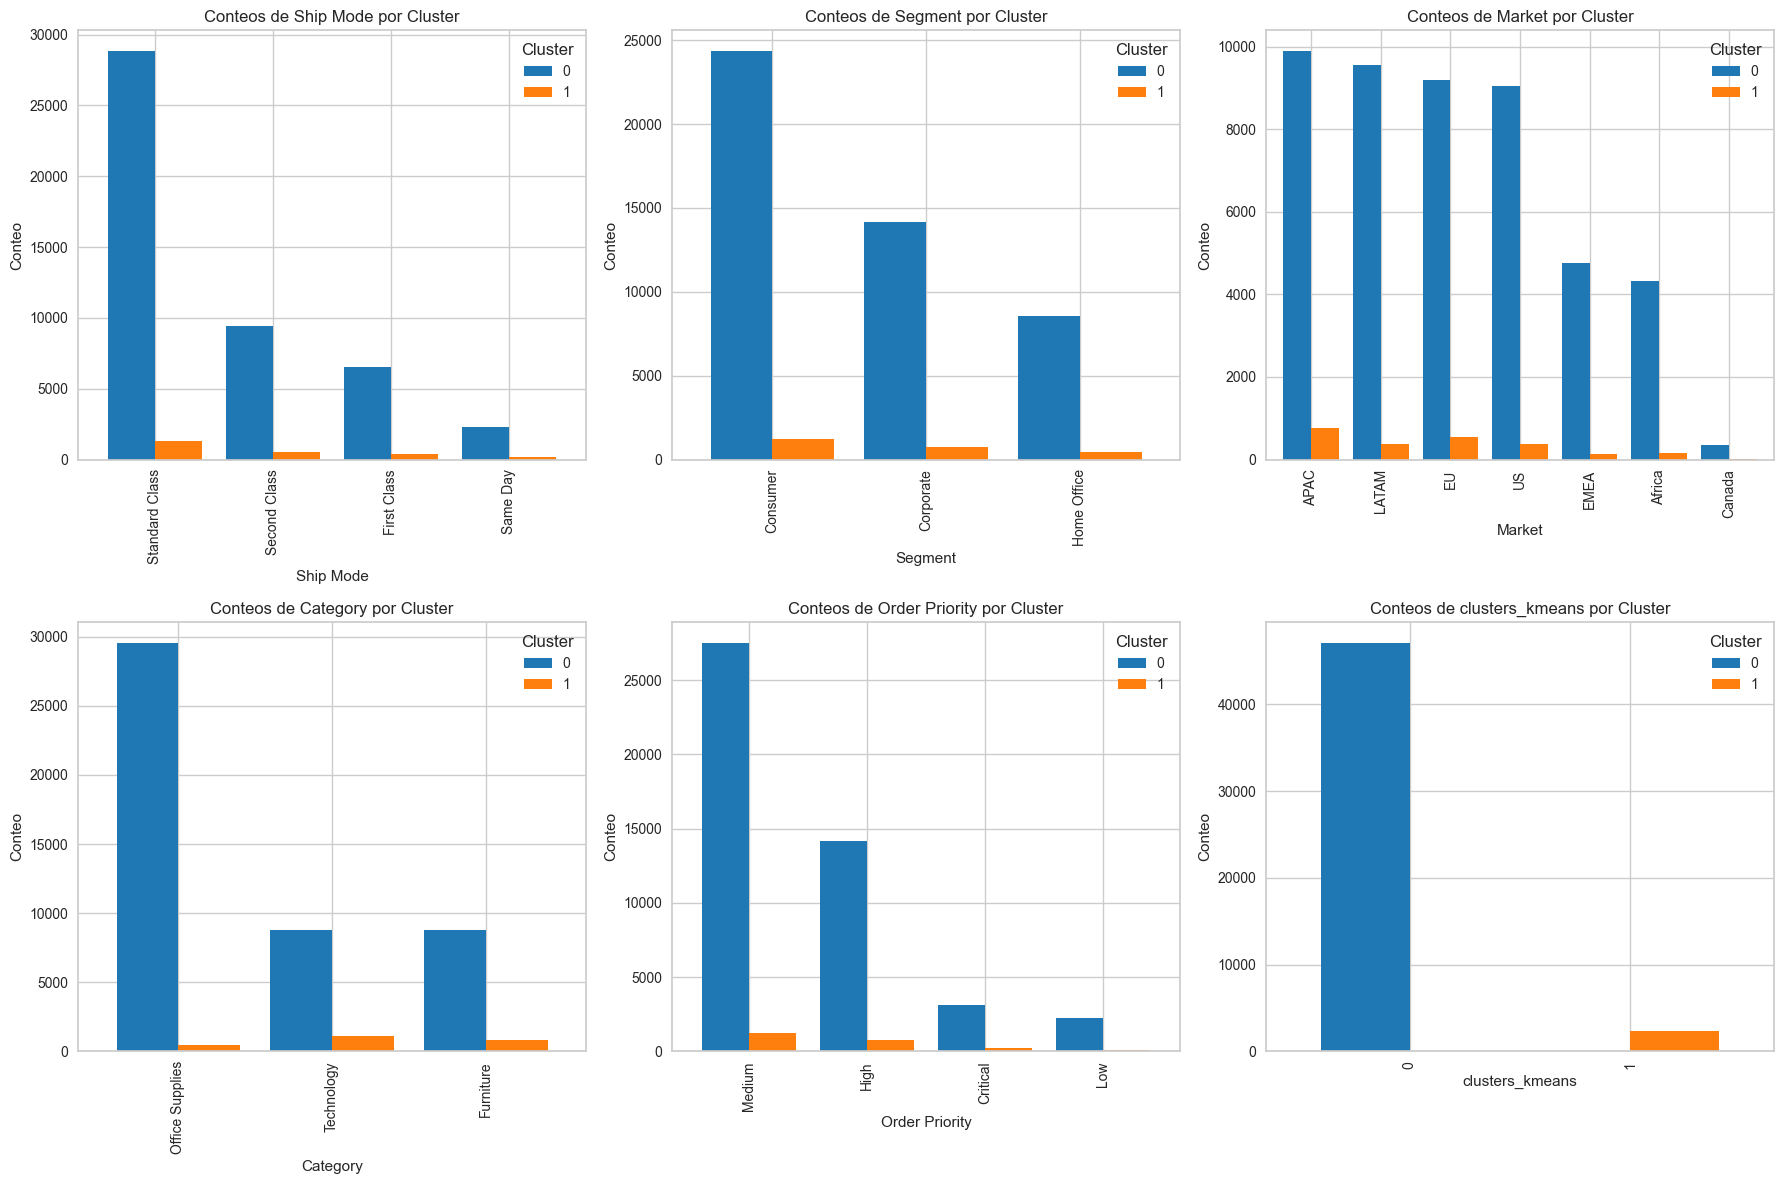

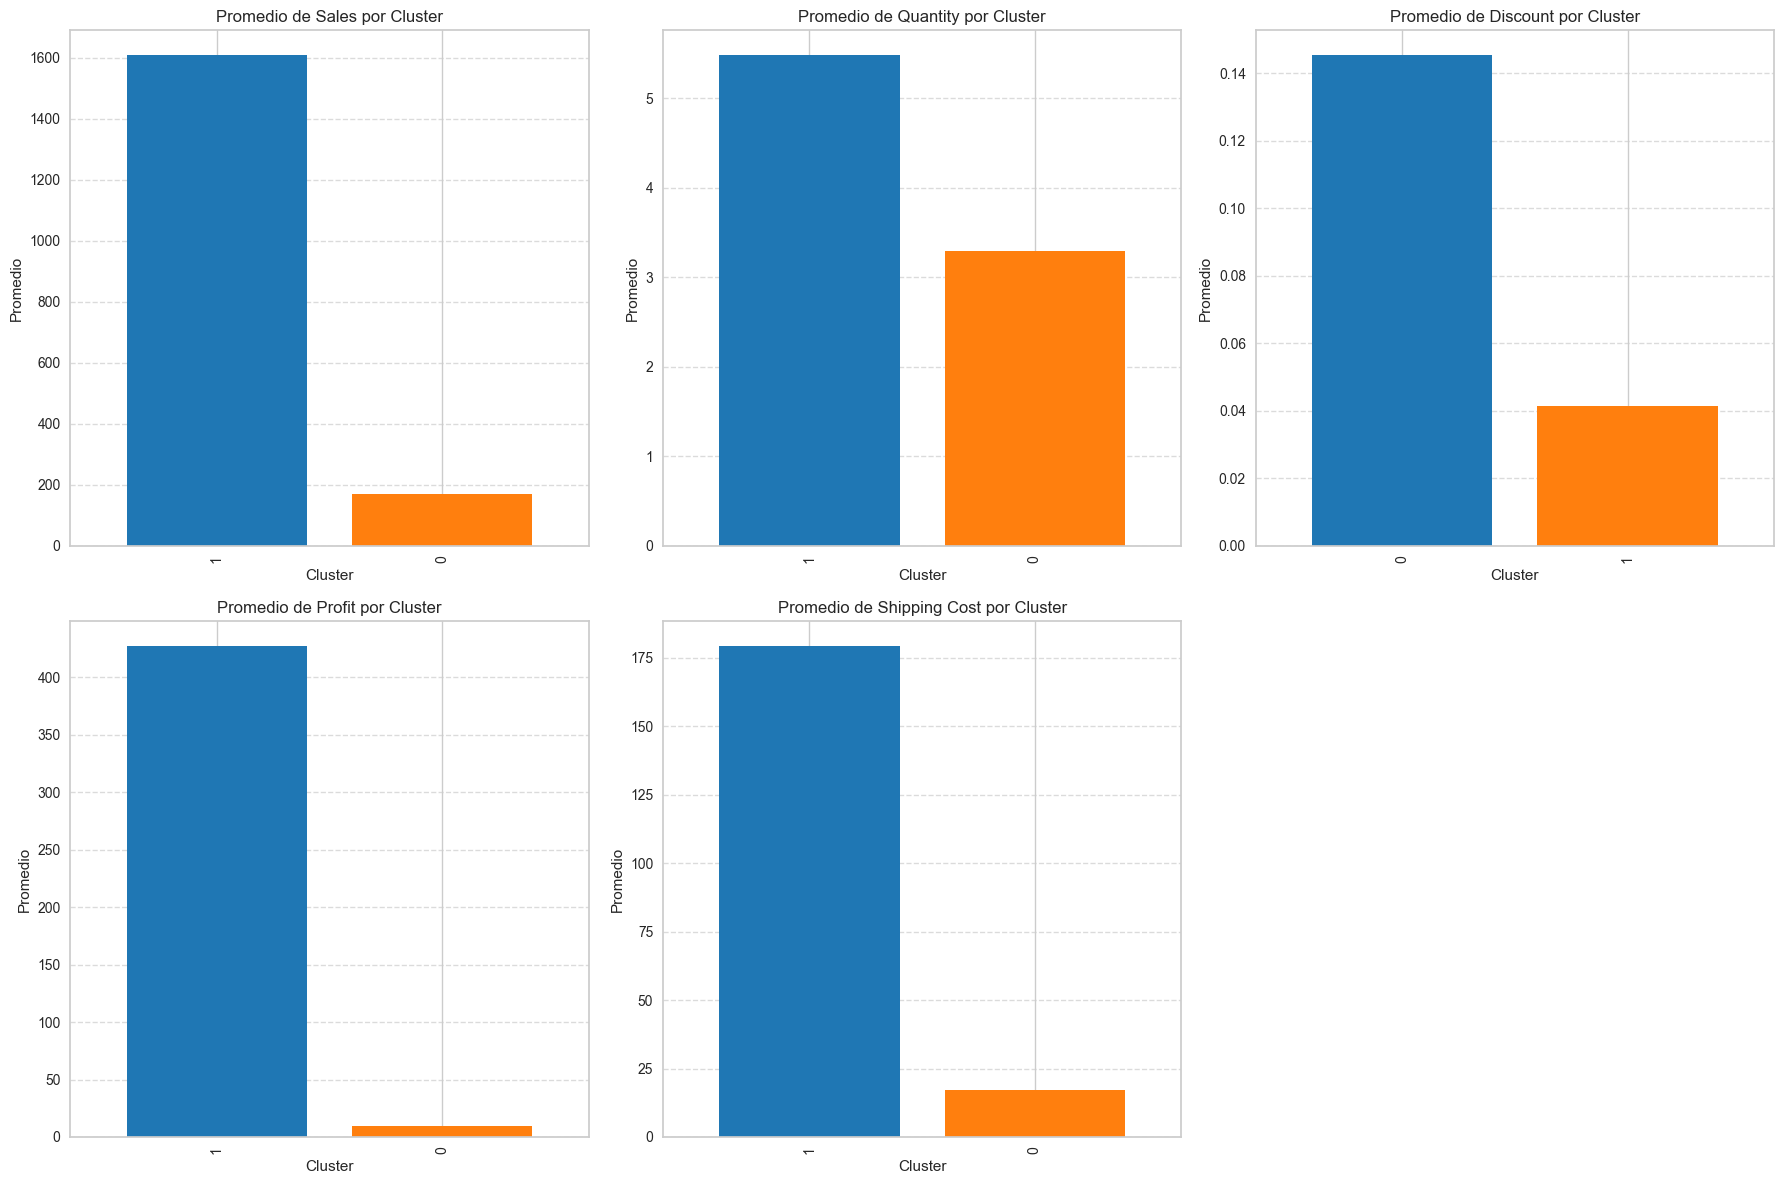

In [11]:
sc.graficar_clusters(df_clusters_kmeans2, cluster_col='clusters_kmeans', figsize=(18, 6), palette="tab10")

- El Cluster 1 agrupa transacciones de mayor valor, con más productos por pedido, mayores ganancias y costos de envío más altos, pero con menos descuentos. Este cluster parece estar asociado a clientes o transacciones premium, como pedidos corporativos o de alto volumen.
- El Cluster 0 representa la mayoría de los datos y se caracteriza por pedidos de menor valor, con menos productos y márgenes de ganancia más bajos. Este cluster está asociado con transacciones más estándar y probablemente promociones o descuentos frecuentes.


Conclusión General
- La segmentación destaca dos perfiles claros de transacciones: uno enfocado en pedidos de alto valor (Cluster 1) y otro representando operaciones de menor escala y márgenes (Cluster 0). Esta información es crucial para diseñar estrategias diferenciadas, como promociones específicas para clientes del Cluster 0 y un enfoque en servicios premium para el Cluster 1.

In [12]:
sc.dividir_y_guardar_clusters(data_encoded_kmeans2, 'clusters_kmeans', output_prefix="cluster")

Archivo guardado: ../results/cluster_1.pkl
Archivo guardado: ../results/cluster_0.pkl


In [13]:
sc.dividir_y_guardar_clusters(df_clusters_kmeans2, 'clusters_kmeans', output_prefix="cluster_sinencod")

Archivo guardado: ../results/cluster_sinencod_1.pkl
Archivo guardado: ../results/cluster_sinencod_0.pkl


In [14]:
df_clusters_kmeans3,labels=cluster.modelo_kmeans(df_original,3)
data_encoded_kmeans3=data_encoded.copy()
data_encoded_kmeans3["clusters_kmeans"]=labels
data_encoded_kmeans3.head(5)

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,Category_Furniture,Category_Office Supplies,Category_Technology,Ship Mode,Order Priority,Sales_robust,Quantity_robust,Discount_robust,Profit_robust,Shipping Cost_robust,clusters_kmeans
0,1,0,0,1,0,0,0,0,0,0,0,0,1,2,1,23.119863,2.000000,0.5,24.372049,41.788214,1
1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,2,23.436346,1.000000,0.0,26.420044,40.079650,1
2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,22.705522,0.666667,1.0,50.779083,39.587477,1
3,0,1,0,1,0,0,0,0,0,0,1,0,0,2,2,20.625843,0.666667,0.0,17.079876,38.108656,1
4,0,0,1,0,0,0,0,0,1,0,1,0,0,2,3,9.703682,1.333333,0.0,16.396488,36.942910,1


In [15]:
df_clusters_kmeans3.head(5)


,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.971,915.49,Medium,1
1,Standard Class,Consumer,APAC,Furniture,5244.840,6,0.0,996.480,878.38,High,1
2,Standard Class,Corporate,US,Office Supplies,5083.960,5,0.2,1906.485,867.69,Low,1
3,First Class,Corporate,APAC,Furniture,4626.150,5,0.0,647.550,835.57,High,1
4,Same Day,Home Office,LATAM,Furniture,2221.800,7,0.0,622.020,810.25,Critical,1


In [16]:
sc.calcular_metricas(data_encoded_kmeans3, "clusters_kmeans")

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.526686,0.959715,"{0: 44019, 1: 638, 2: 4834}"


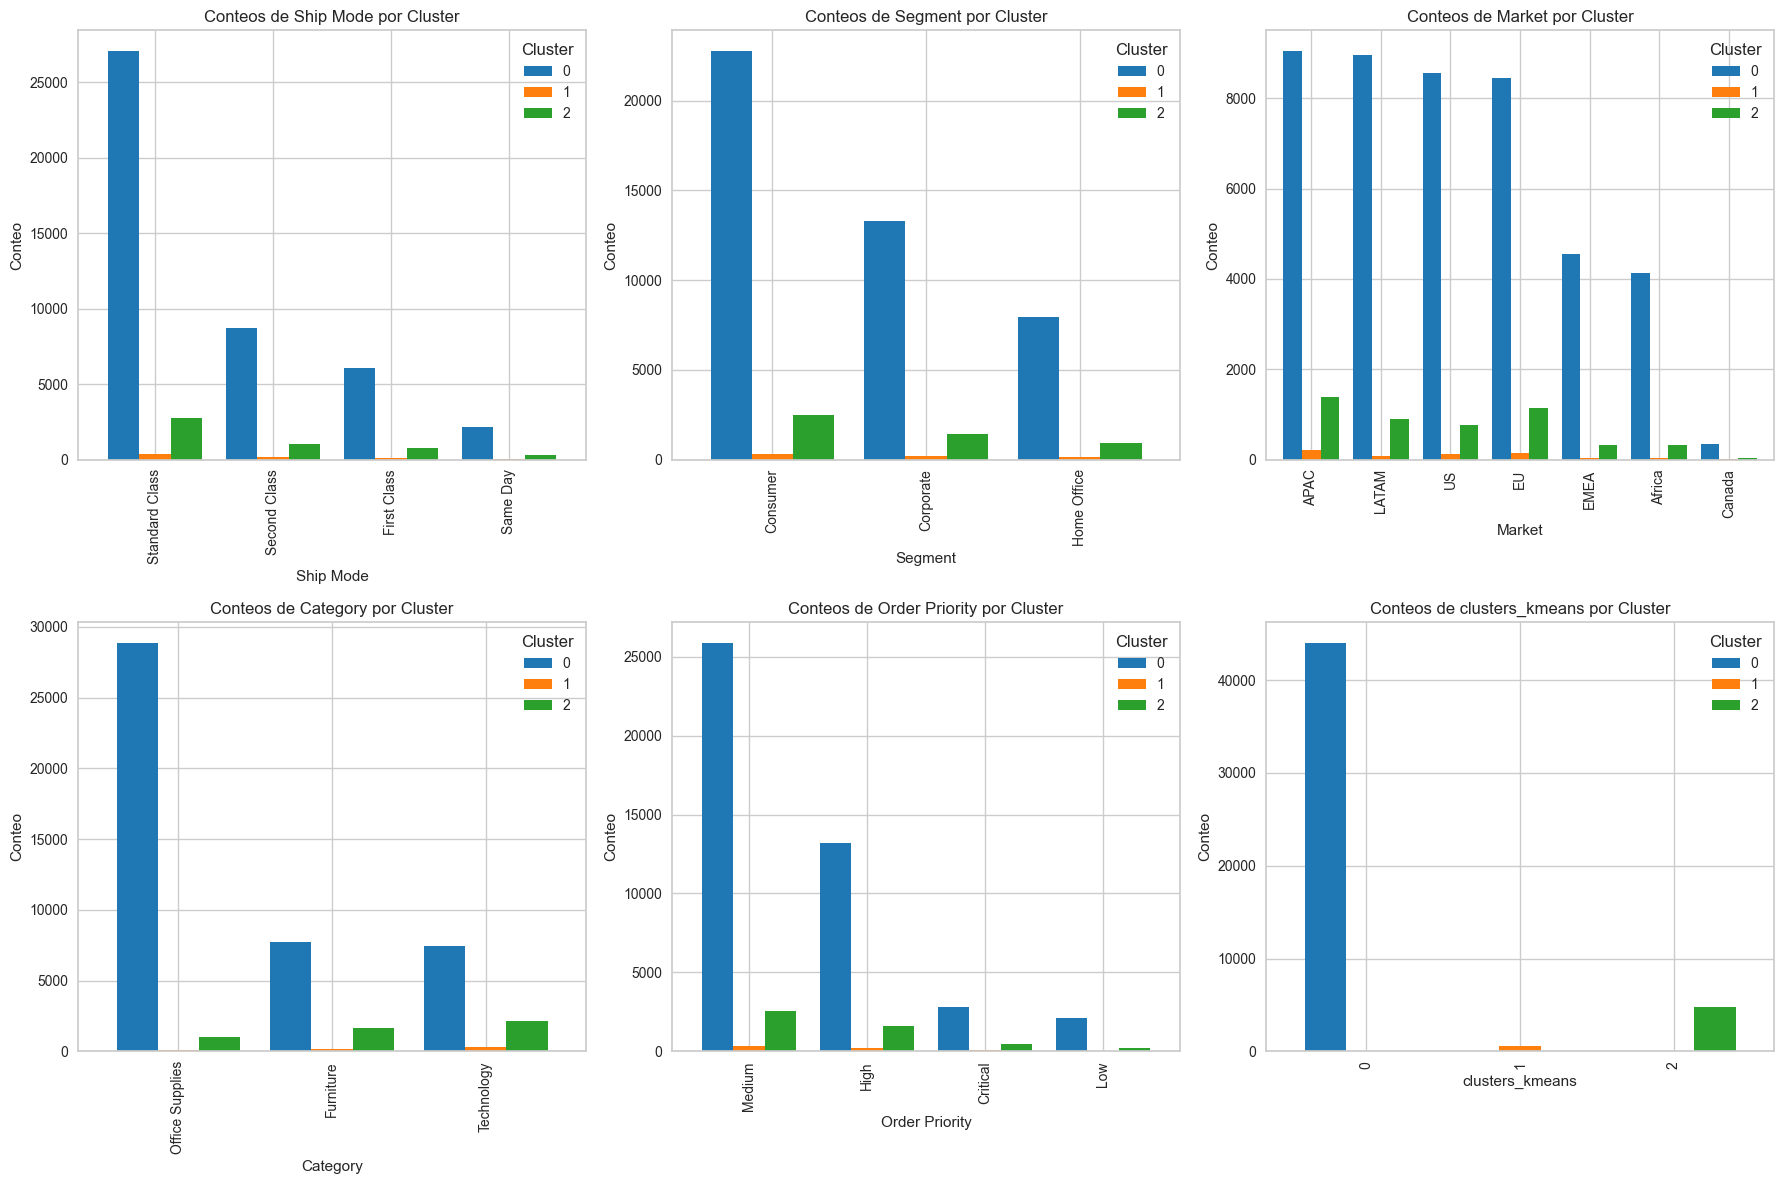

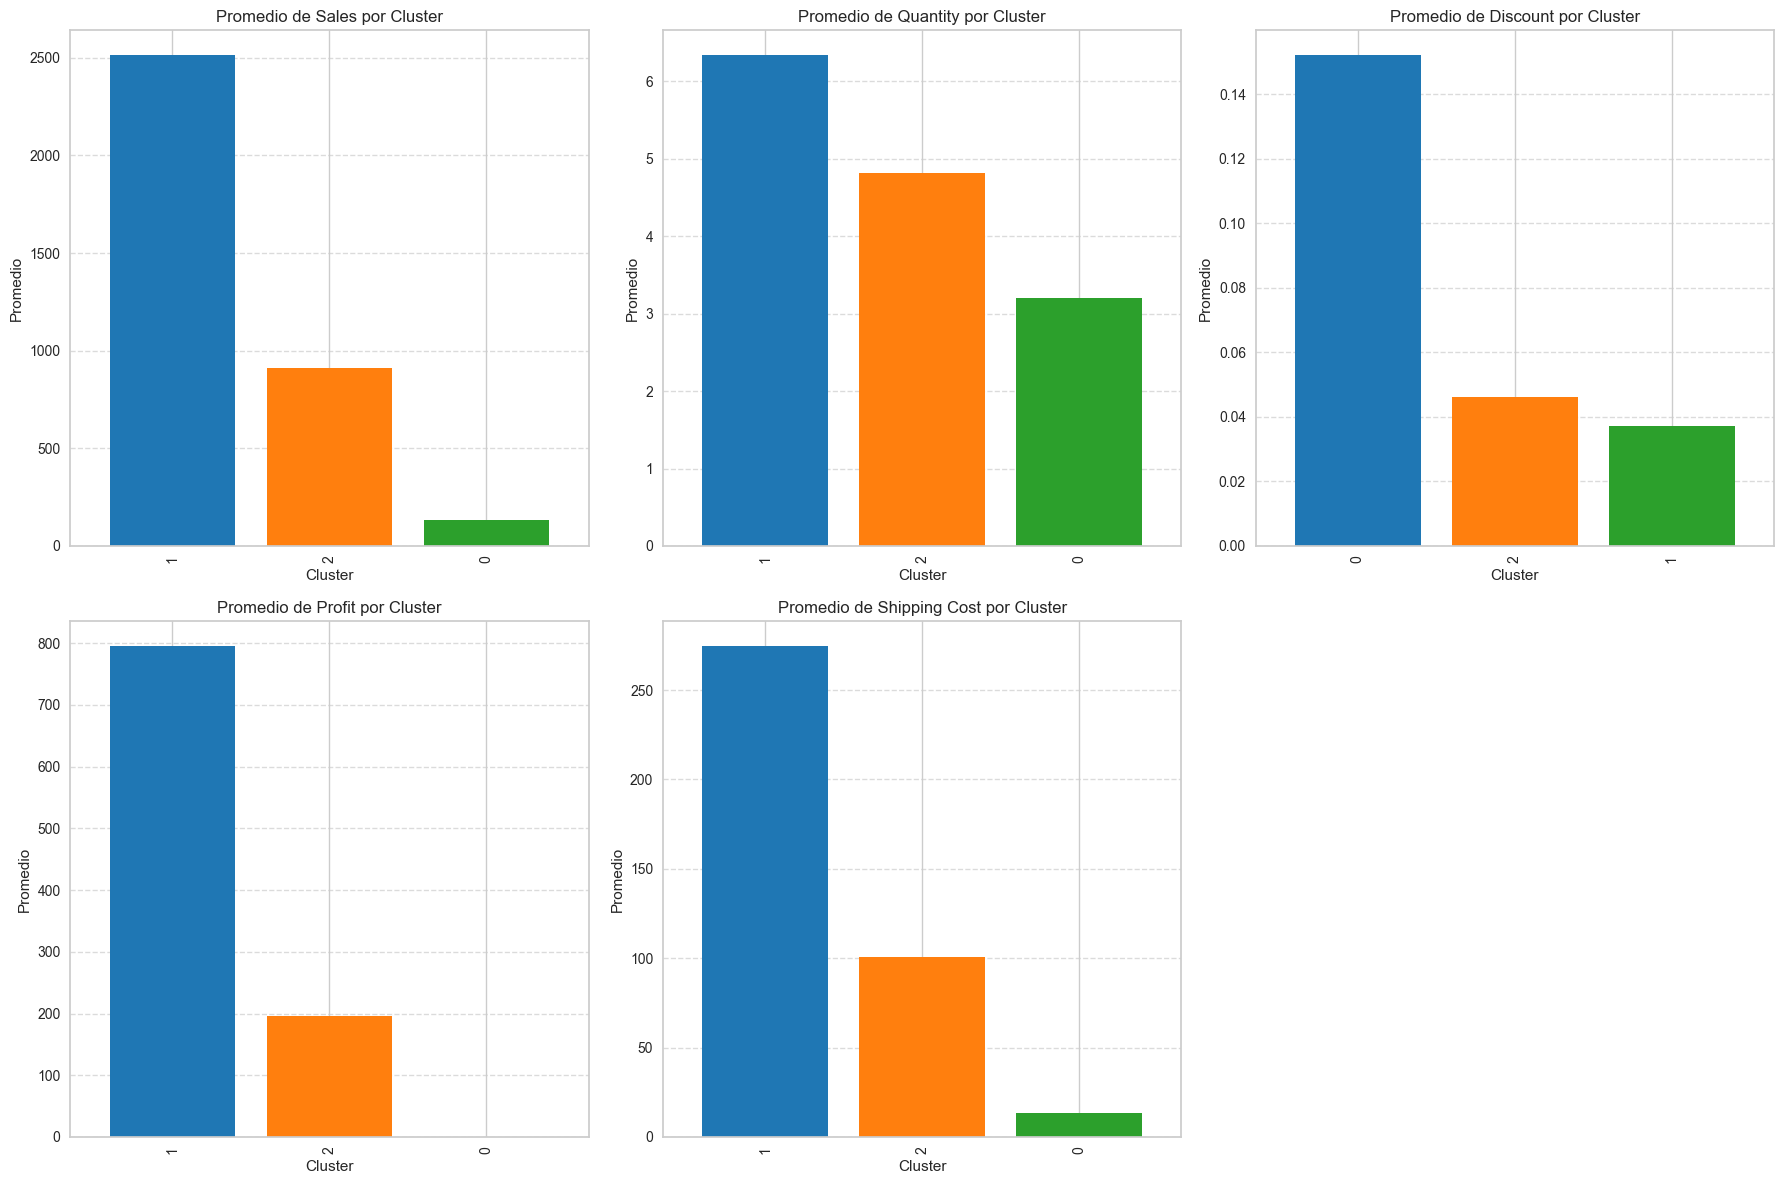

In [17]:
sc.graficar_clusters(df_clusters_kmeans3, cluster_col='clusters_kmeans', figsize=(18, 6), palette="tab10")


SE INTENTO CON OTROS MODELOS DE CLUSTERIZACION PERO SE DEJAN COMENTADOS POR NO PODER CORRERLOS CON ESTE ORDENADOR

In [18]:
# resultados = {}

# # Monitorear el progreso con tqdm
# for n_clusters in tqdm(range(2, 11), desc="Probando diferentes números de clusters"):
#     modelo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
#     labels = modelo.fit_predict(data_encoded)
#     silhouette = silhouette_score(data_encoded, labels)
#     resultados[n_clusters] = silhouette

# # Mostrar resultados
# print("\nResultados:")
# for n_clusters, score in resultados.items():
#     print(f"Clusters: {n_clusters}, Silhouette Score: {score}")


In [19]:
# df_clusters_aglomerativo=cluster.modelo_aglomerativo(2, "ward", df_original)

In [20]:
# df_clusters_espectral2,labels_espectral2=cluster.modelo_espectral(df_original, n_clusters=2, assign_labels='kmeans')
# df_clusters_espectral2.head(3)

In [21]:
# data_encoded_espectral2=data_encoded.copy()
# data_encoded_espectral2["clusters_spectral"]=labels_espectral2
# data_encoded_espectral2.head(5)

In [22]:
# sc.calcular_metricas(df_clusters_espectral2, "clusters_spectral")

In [23]:
# sc.graficar_clusters(data_encoded_espectral2, cluster_col='clusters_spectral', figsize=(18, 6), palette="tab10")

In [24]:
# df_clusters_dbscan,resultados,labels_dbscan=cluster.modelo_dbscan(df_original, eps_values=[1.0, 1.5, 2.0], min_samples_values=[1000])
# df_clusters_dbscan.head(3)

In [25]:
# resultados

In [26]:
# data_encoded_dbscan=data_encoded.copy()
# data_encoded_dbscan["clusters_dbscan"]=labels_dbscan
# data_encoded_dbscan.head(5)

In [27]:
# sc.calcular_metricas(data_encoded_dbscan, "clusters_dbscan")

In [28]:
# sc.graficar_clusters(df_clusters_dbscan, cluster_col='clusters_dbscan', figsize=(18, 6), palette="tab10")